# Running scenarios

Here we show how multiple scenarios can be run using the OpenSCM Two Layer Model package.

In [1]:
# NBVAL_IGNORE_OUTPUT
import os.path

import numpy as np
import pandas as pd
from openscm_units import unit_registry as ur
import tqdm.autonotebook as tqdman
from scmdata import ScmRun, run_append

from openscm_twolayermodel import TwoLayerModel

import matplotlib.pyplot as plt

/Users/znicholls/Documents/AGCEC/MCastle/openscm-twolayermodel/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import sys


For this we use RCMIP effective radiative forcing data.

In [2]:
DATA_PATH = os.path.join(
    "..",
    "..",
    "..",
    "tests",
    "test-data",
    "rcmip-radiative-forcing-annual-means-v4-0-0.csv",
)
DATA_PATH

'../../../tests/test-data/rcmip-radiative-forcing-annual-means-v4-0-0.csv'

In [3]:
# NBVAL_IGNORE_OUTPUT
scenarios = ScmRun(DATA_PATH, lowercase_cols=True).filter(
    scenario="historical", keep=False
)
scenarios

<scmdata.ScmRun (timeseries: 480, timepoints: 751)>
Time:
	Start: 1750-01-01T00:00:00
	End: 2500-01-01T00:00:00
Meta:
	        activity_id mip_era        model region          scenario   unit  \
	0    not_applicable   CMIP5          AIM  World             rcp60  W/m^2   
	1    not_applicable   CMIP5          AIM  World             rcp60  W/m^2   
	2    not_applicable   CMIP5          AIM  World             rcp60  W/m^2   
	3    not_applicable   CMIP5          AIM  World             rcp60  W/m^2   
	4    not_applicable   CMIP5          AIM  World             rcp60  W/m^2   
	..              ...     ...          ...    ...               ...    ...   
	494  not_applicable   CMIP5  unspecified  World  historical-cmip5  W/m^2   
	495  not_applicable   CMIP5  unspecified  World  historical-cmip5  W/m^2   
	496  not_applicable   CMIP5  unspecified  World  historical-cmip5  W/m^2   
	497  not_applicable   CMIP5  unspecified  World  historical-cmip5  W/m^2   
	498  not_applicable   CMIP5  unspe

We can then run them, for a number of parameter settings, as shown.

In [4]:
# NBVAL_IGNORE_OUTPUT
a_values = np.array([0, 0.01]) * ur("W/m^2/delta_degC^2")
a_values

Magnitude,[0.0 0.01]
Units,watt/(delta_degree_Celsius2 meter2)


In [5]:
# NBVAL_IGNORE_OUTPUT
runner = TwoLayerModel()
output = []
for a in tqdman.tqdm(a_values, desc="Parameter settings"):
    runner.a = a
    output.append(runner.run_scenarios(scenarios))

output = run_append(output)
output

<scmdata.ScmRun (timeseries: 80, timepoints: 751)>
Time:
	Start: 1750-01-01T00:00:00
	End: 2500-01-01T00:00:00
Meta:
	    a (watt / delta_degree_Celsius ** 2 / meter ** 2)     activity_id  \
	0                                                0.00  not_applicable   
	1                                                0.00  not_applicable   
	2                                                0.00  not_applicable   
	3                                                0.00  not_applicable   
	4                                                0.00  not_applicable   
	..                                                ...             ...   
	75                                               0.01  not_applicable   
	76                                               0.01  not_applicable   
	77                                               0.01  not_applicable   
	78                                               0.01  not_applicable   
	79                                               0.01  not_applicabl

<AxesSubplot:xlabel='time', ylabel='W/m^2'>

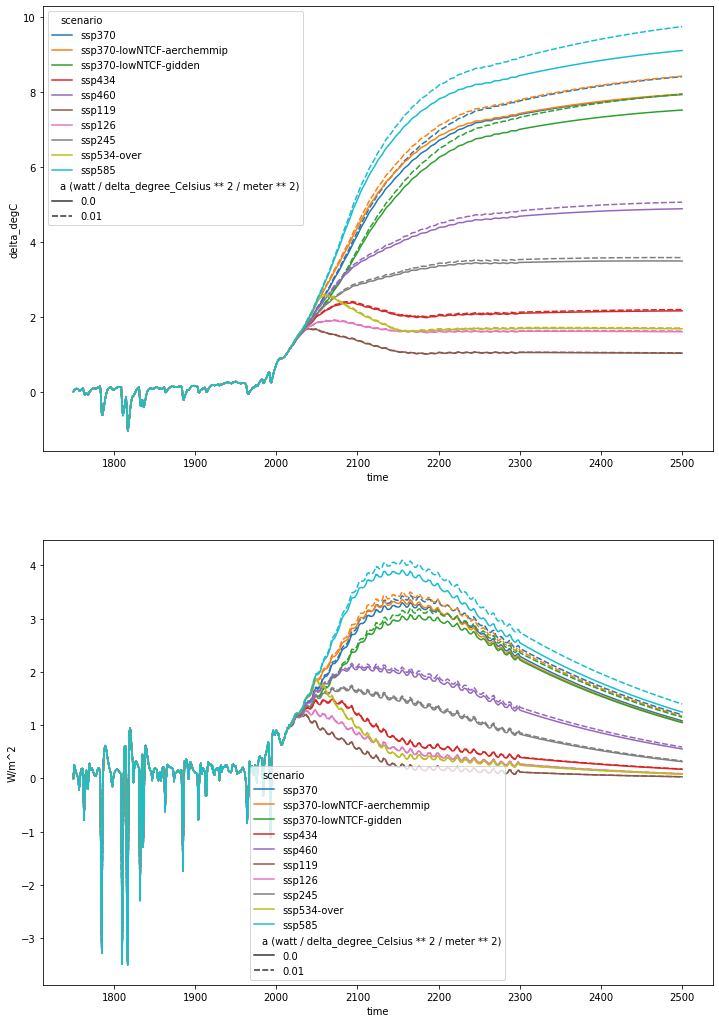

In [6]:
# NBVAL_IGNORE_OUTPUT
pkwargs = dict(
    hue="scenario", style="a (watt / delta_degree_Celsius ** 2 / meter ** 2)",
)
fig = plt.figure(figsize=(12, 18))

ax = fig.add_subplot(211)
output.filter(variable="Surface Temperature|Upper").lineplot(**pkwargs, ax=ax)

ax = fig.add_subplot(212)
output.filter(variable="Heat Uptake").lineplot(**pkwargs, ax=ax)